In [1]:
# Import dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd

# Compare different factors in the California housing dataset

In [2]:
# Read in the California housing dataset
california_dataset = datasets.fetch_california_housing()
housing_data = pd.DataFrame(data=california_dataset.data,columns=california_dataset.feature_names)
housing_data['MEDV'] = california_dataset.target

In [3]:
# Reduce the dataset to remove AveRooms outliers
housing_data_reduced = pd.DataFrame(housing_data.loc[housing_data['AveRooms']<10,:])

# Reduce the dataset to the San Diego Area (based on approx latitude & longitude area)
san_diego_housing = pd.DataFrame(housing_data_reduced.loc[((housing_data_reduced['Latitude']>32.664282) & 
                                                          (housing_data_reduced['Latitude']<32.980514) &
                                                          (housing_data_reduced['Longitude']>-117.300418) &
                                                          (housing_data_reduced['Longitude']<-117.01950)),:])

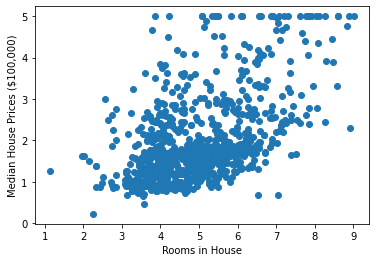

In [4]:
# Plot out rooms versus median house price
x_values = san_diego_housing['AveRooms']
y_values = san_diego_housing['MEDV']
plt.scatter(x_values,y_values)
plt.xlabel('Rooms in House')
plt.ylabel('Median House Prices ($100,000)')
plt.show()

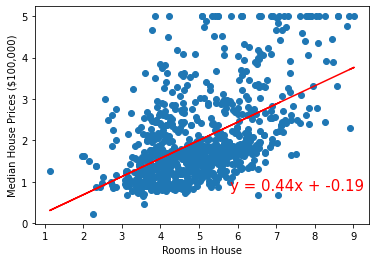

In [5]:
# Add the linear regression equation and line to plot
x_values = san_diego_housing['AveRooms']
y_values = san_diego_housing['MEDV']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Rooms in House')
plt.ylabel('Median House Prices ($100,000)')
plt.show()

The r-squared is: 0.27748572828217366


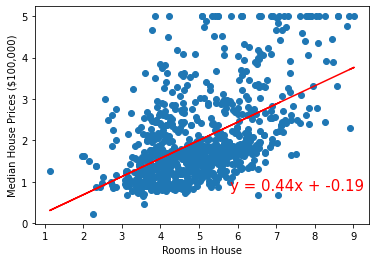

In [6]:
# Print out the r-squared value along with the plot.
x_values = san_diego_housing['AveRooms']
y_values = san_diego_housing['MEDV']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Rooms in House')
plt.ylabel('Median House Prices ($100,000)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

# Compare linear relationships with the diabetes dataset

In [7]:
# Read in the diabetes dataset
diabetes_data = datasets.load_diabetes()
data = pd.DataFrame(diabetes_data.data,columns=diabetes_data.feature_names)
data['1Y_Disease_Progress'] = diabetes_data.target

The r-squared is: 0.19490798886682947


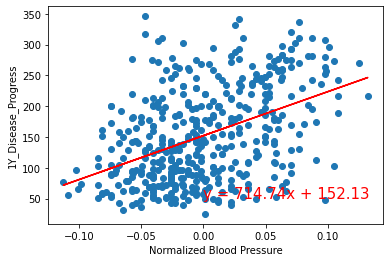

In [8]:
# Plot the different factors in a scatter plot
x_values = data['bp']
y_values = data['1Y_Disease_Progress']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Normalized Blood Pressure')
plt.ylabel('1Y_Disease_Progress')
print(f"The r-squared is: {rvalue**2}")
plt.show()